# Import semua library yang di butuhkan

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Import dataset

In [ ]:
df = pd.read_table('amazon_cells_labelled.txt',header=None, names=['message','is_positive'])
df.head()

,message,is_positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Pengecekan nilai true or false

In [ ]:
df.isnull().values.any()

False

# Mengekstrak fitur yang akan digunakan untuk Model Naive Bayes Bournelli menggunakan kata kunci untuk memprediksi apakah ulasan itu positif atau negatif

In [ ]:
keywords = ['Good', 'Bad', 'Excellent', 'Great', 'Best', 'Love', 'Loved', 'Happy', 
            'Nice', 'Easy', 'Very well', 'Broke', 'Broken', 'Not', 'Recommend', 'Worst']

for key in keywords:
    df[str(key)] = df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

# Menggunakan heatmap untuk menampilkan variabel independen

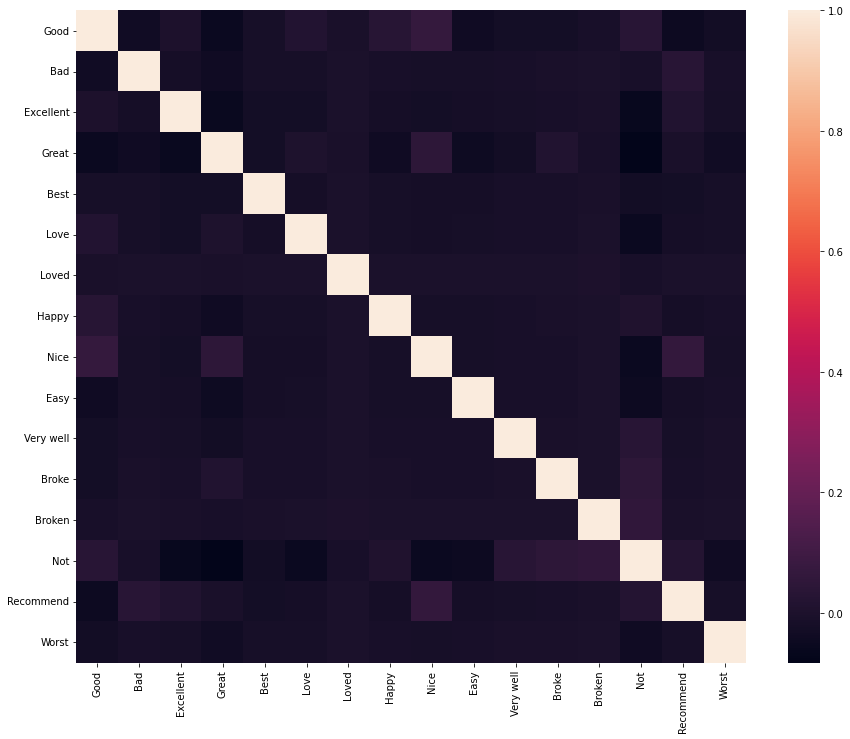

In [ ]:
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df[keywords].corr())
plt.show()

# Menetapkan target hasil dan variabel independen dengan menjalankan Naive Bayes Bernoulli dengan 3 fold

In [ ]:
data = df[keywords]
target = df['is_positive']

# menjalankan nb bernoulli dengan 3 fold
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
bnb = BernoulliNB()
y_pred = []
for train, test in skf.split(data, target):
    data_train, data_test = data.iloc[train], data.iloc[test]
    target_train, target_test = target.iloc[train], target.iloc[test]
    bnb.fit(data_train, target_train)
    y_pred.extend(bnb.predict(data_test))

# Menghitung Confussion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))

df['y_pred'] = y_pred

fp = df.loc[(df['is_positive'] ==False) & (df['y_pred'] == True)].shape[0]
fn = df.loc[(df['is_positive'] ==True) & (df['y_pred'] == False)].shape[0]
sense = df.loc[(df['is_positive'] ==True) & (df['y_pred'] == True)].shape[0]
spec = df.loc[(df['is_positive'] ==False) & (df['y_pred'] == False)].shape[0]

print('\nFalse Positive:{}\nFalse Negative:{}\nSensitivity:{}\nSpecificity:{}'.format(fp,fn,sense,spec))

print('Accuracy:',(target == y_pred).sum() / data.shape[0])

[[471  29]
 [250 250]]

False Positive:29
False Negative:250
Sensitivity:250
Specificity:471
Accuracy: 0.721


# Menjalankan mode pada dataset imdb

In [ ]:
imdb_df = pd.read_table('imdb_labelled.txt',header=None, names=['message','is_positive'])

for key in keywords:
    imdb_df[str(key)] = imdb_df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

# Menetapkan target hasil dan variabel independen
data = imdb_df[keywords]
target = imdb_df['is_positive']

# menjalankan nb bernoulli dengan 3 fold
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
bnb = BernoulliNB()
y_pred = []
for train, test in skf.split(data, target):
    data_train, data_test = data.iloc[train], data.iloc[test]
    target_train, target_test = target.iloc[train], target.iloc[test]
    bnb.fit(data_train, target_train)
    y_pred.extend(bnb.predict(data_test))

print("Number of mislabeled points out of a total {} points : {}\n".format(
    data.shape[0],
    (target != y_pred).sum()
))

# Menghitung confusion matrix and akurasi.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))
print('Accuracy:',(target == y_pred).sum() / data.shape[0])

Number of mislabeled points out of a total 748 points : 314

[[ 72 290]
 [ 24 362]]
Accuracy: 0.5802139037433155


# Menjalankan model apda dataset Yelp

In [ ]:
yelp_df = pd.read_table('yelp_labelled.txt',header=None, names=['message','is_positive'])

for key in keywords:
    yelp_df[str(key)] = yelp_df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

# Menetapkan target hasil dan variabel independen
data = yelp_df[keywords]
target = yelp_df['is_positive']

# menjalankan nb bernoulli dengan 3 fold
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
bnb = BernoulliNB()
y_pred = []
for train, test in skf.split(data, target):
    data_train, data_test = data.iloc[train], data.iloc[test]
    target_train, target_test = target.iloc[train], target.iloc[test]
    bnb.fit(data_train, target_train)
    y_pred.extend(bnb.predict(data_test))

print("Number of mislabeled points out of a total {} points : {}\n".format(
    data.shape[0],
    (target != y_pred).sum()
))

# Menghitung confusion matrix and akurasi.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(target, y_pred))
print('Accuracy:',(target == y_pred).sum() / data.shape[0])

Number of mislabeled points out of a total 1000 points : 362

[[455  45]
 [317 183]]
Accuracy: 0.638
